In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan = pd.read_csv("loan.csv")
display(loan.head())
display(loan.shape)

C:\Users\SOLDIER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


(39717, 111)

In [3]:
sum(loan.duplicated(subset = "member_id")) == 0

True

### No duplicate records are found

# Data Cleaning

In [4]:
null_count = loan.isnull().sum()
null_percentage = round(loan.isnull().sum()*100/loan.shape[0],2)
null_info = pd.concat([null_count,null_percentage],axis = 1)
null_info.rename(columns={0: 'null_count', 1: 'null_percentage'}, inplace=True)

In [5]:
null_info.groupby(['null_count','null_percentage']).size()

null_count  null_percentage
0           0.00               43
2           0.01                1
11          0.03                1
39          0.10                1
50          0.13                1
56          0.14                2
71          0.18                1
697         1.75                1
1075        2.71                1
2459        6.19                1
12940       32.58               1
25682       64.66               1
36931       92.99               1
38577       97.13               1
39717       100.00             54
dtype: int64

### dropping columns with more than 90 percent of null values

In [6]:
loan = loan.loc[:, loan.isnull().mean() < .9]

In [7]:
loan.shape

(39717, 55)

In [8]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


### removing columns with zero variance

In [9]:
uniques = loan.nunique().sort_values()
uniques

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d          

In [10]:
loan = loan.drop(uniques[uniques <= 1].index,axis = 1)
loan.shape

(39717, 46)

In [11]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [12]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#### removing some of the unwanted columns for our problem statement

As we don't know the some of details in the dataset before providing a loan. hence we're deleting those columns as we are required to focus on type of applications or applicants that defaults the loan or not.

further we will use these type of columns for building a model but not for the present analysis scenario

In [13]:
loan = loan.drop(['url','desc','zip_code','delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq',
          'revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','funded_amnt', 'funded_amnt_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
           'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 
           'last_credit_pull_d','pub_rec_bankruptcies','emp_title','title','addr_state'],axis = 1)
loan.shape

(39717, 18)

In [14]:
loan.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,open_acc,pub_rec
0,1077501,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,3,0
1,1077430,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,3,0
2,1077175,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,2,0
3,1076863,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,10,0
4,1075358,1311748,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,15,0


### Thought of extracting numeric values from emp_length but as we however considers it as categorical during analysis i maintained it as it is.

In [15]:
loan['int_rate'] = loan['int_rate'].str.replace("%","")
loan['int_rate'] = pd.to_numeric(loan['int_rate'])

In [16]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format = '%b-%y')
loan['issue_month'] = loan['issue_d'].dt.month
loan['issue_year'] = loan['issue_d'].dt.year

In [17]:
loan.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,open_acc,pub_rec,issue_month,issue_year
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,3,0,12,2011
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,3,0,12,2011
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2,0,12,2011
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,10,0,12,2011
4,1075358,1311748,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,17.94,15,0,12,2011


In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
id                     39717 non-null int64
member_id              39717 non-null int64
loan_amnt              39717 non-null int64
term                   39717 non-null object
int_rate               39717 non-null float64
installment            39717 non-null float64
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null datetime64[ns]
loan_status            39717 non-null object
purpose                39717 non-null object
dti                    39717 non-null float64
open_acc               39717 non-null int64
pub_rec                39717 non-null int64
issue_month            39717 non-null int64
issue_year             39717 n

In [19]:
for col in ['term', 'grade', 'sub_grade', 'emp_length','home_ownership','verification_status','loan_status','purpose','pub_rec']:
    loan[col] = loan[col].astype('category')

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
id                     39717 non-null int64
member_id              39717 non-null int64
loan_amnt              39717 non-null int64
term                   39717 non-null category
int_rate               39717 non-null float64
installment            39717 non-null float64
grade                  39717 non-null category
sub_grade              39717 non-null category
emp_length             38642 non-null category
home_ownership         39717 non-null category
annual_inc             39717 non-null float64
verification_status    39717 non-null category
issue_d                39717 non-null datetime64[ns]
loan_status            39717 non-null category
purpose                39717 non-null category
dti                    39717 non-null float64
open_acc               39717 non-null int64
pub_rec                39717 non-null category
issue_month            39717 non-null int64
issue_year 

##### removing loan_status =  current ,as they are not defaulters yet so we cannot draw any conclusions on them

In [21]:
loan = loan[(loan['loan_status'] == 'Charged Off') | (loan['loan_status'] == 'Fully Paid')]
loan.reset_index(drop = True, inplace = True)

In [22]:
loan.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,open_acc,pub_rec,issue_month,issue_year
0,1077501,1296599,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,3,0,12,2011
1,1077430,1314167,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,3,0,12,2011
2,1077175,1313524,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2,0,12,2011
3,1076863,1277178,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,10,0,12,2011
4,1075269,1311441,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,11.20,9,0,12,2011


In [23]:
loan['loan_status'] = ["Defaulters" if x in ['Charged Off'] else "Non-Defaulters" for x in loan['loan_status'] ]
loan.shape

(38577, 20)

In [24]:
display(loan.shape)
loan.tail()

(38577, 20)

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,open_acc,pub_rec,issue_month,issue_year
38572,92187,92174,2500,36 months,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,2007-07-01,Non-Defaulters,home_improvement,11.33,13,0,7,2007
38573,90665,90607,8500,36 months,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,2007-07-01,Non-Defaulters,credit_card,6.40,6,0,7,2007
38574,90395,90390,5000,36 months,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,2007-07-01,Non-Defaulters,debt_consolidation,2.30,11,0,7,2007
38575,90376,89243,5000,36 months,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,2007-07-01,Non-Defaulters,other,3.72,17,0,7,2007
38576,87023,86999,7500,36 months,13.75,255.43,E,E2,< 1 year,OWN,22000.0,Not Verified,2007-06-01,Non-Defaulters,debt_consolidation,14.29,7,0,6,2007


In [25]:
status_count = loan['loan_status'].value_counts()
print('defaulters percentage:',100*status_count['Defaulters']/len(loan['loan_status']))

defaulters percentage: 14.586411592399616


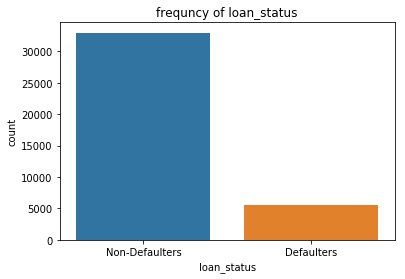

In [26]:
sns.countplot(loan['loan_status'])
plt.title('frequncy of loan_status')
plt.show()

### 14.6 percent of borrowers are defaulting loan

In [27]:
def def_anal(col):
    df = loan.groupby('loan_status')[col].value_counts().unstack(level = 0).reset_index()
    df['def_percent'] = df['Defaulters']/(df['Defaulters']+df['Non-Defaulters'])
    return df

### categorical analysis

In [28]:
def count_plot(col):
    plt.figure(figsize=(14,5))
    s = sns.countplot(loan[col],hue = loan['loan_status'])
    return plt.show()

def def_percentage_plot(col):
    plt.figure(figsize=(14,5))
    r = sns.barplot(x=col, y="def_percent", data=def_anal(col))
    return plt.show()
    

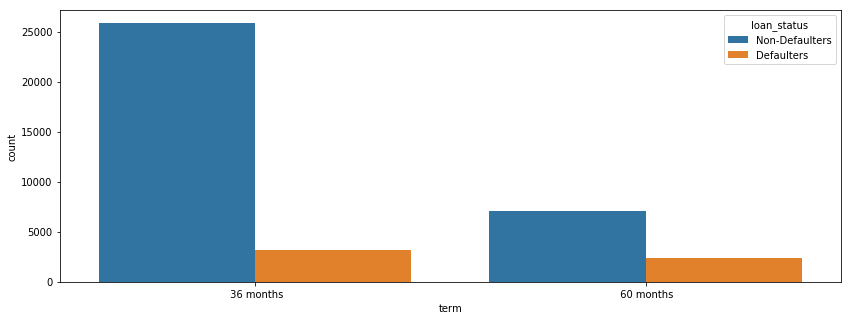

In [29]:
count_plot('term')

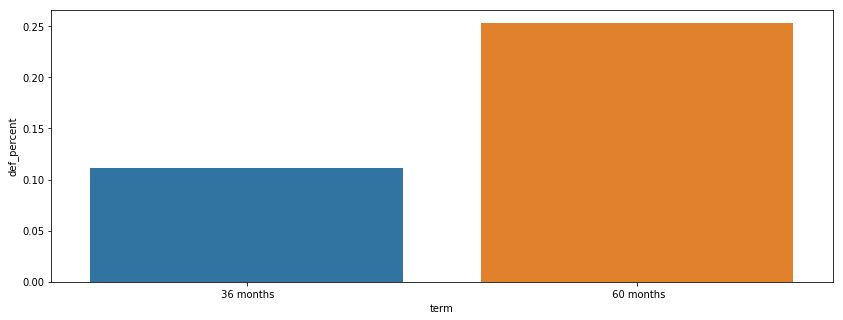

In [30]:
def_percentage_plot('term')

### longer term period loans are defaulted the most

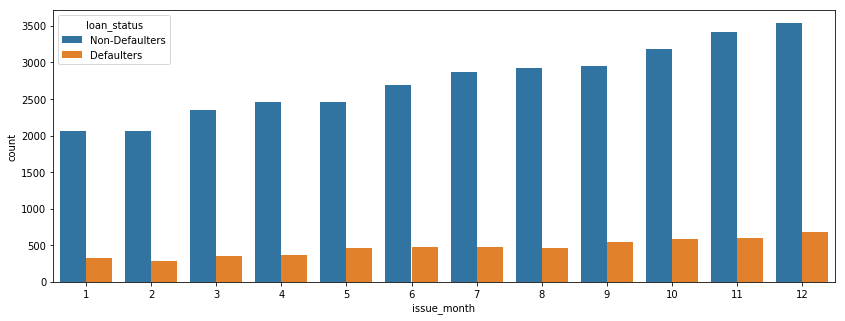

In [31]:
count_plot('issue_month')

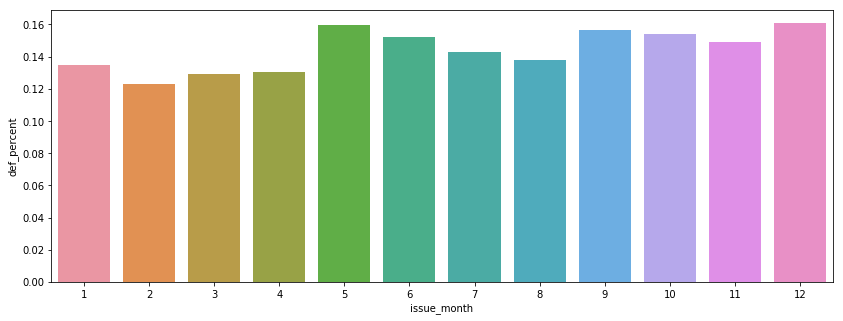

In [32]:
def_percentage_plot('issue_month')

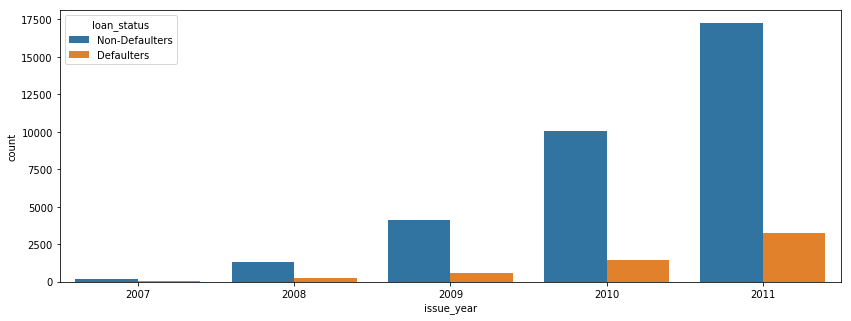

In [33]:
count_plot('issue_year')

In [34]:
loan.groupby('loan_status')['issue_year'].value_counts()

loan_status     issue_year
Defaulters      2011           3256
                2010           1485
                2009            594
                2008            247
                2007             45
Non-Defaulters  2011          17260
                2010          10047
                2009           4122
                2008           1315
                2007            206
Name: issue_year, dtype: int64

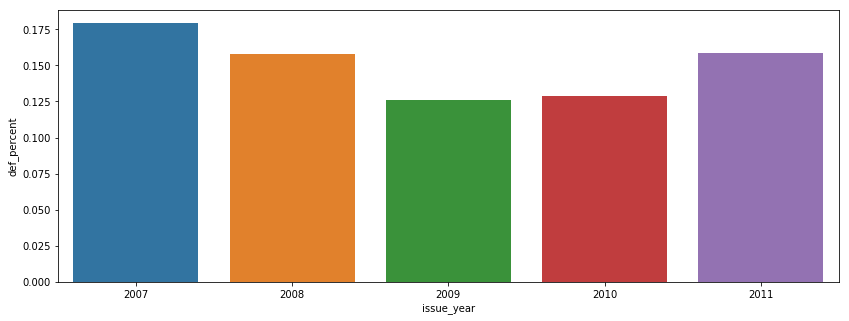

In [35]:
def_percentage_plot('issue_year')

#### in 2007 default percentage is higher ,of course only 253 loans were issued in that year
### but considering the fact that most loans were issued in 2011 and its default percentage is also higher more financial loss has occured in this period

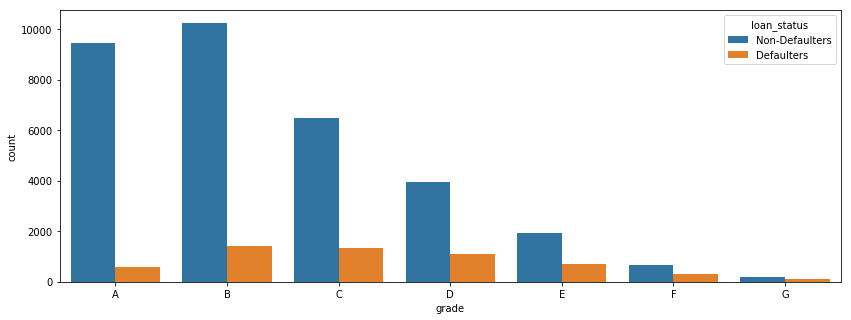

In [36]:
count_plot('grade')

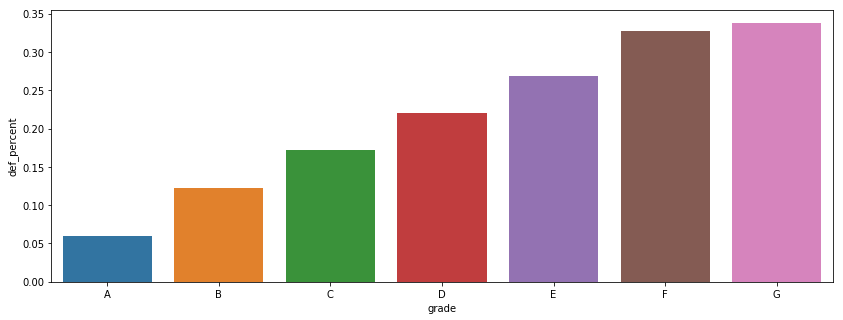

In [37]:
def_percentage_plot('grade')

#### default percentage is more for G-grade loans however less number of loans are issued for that grade

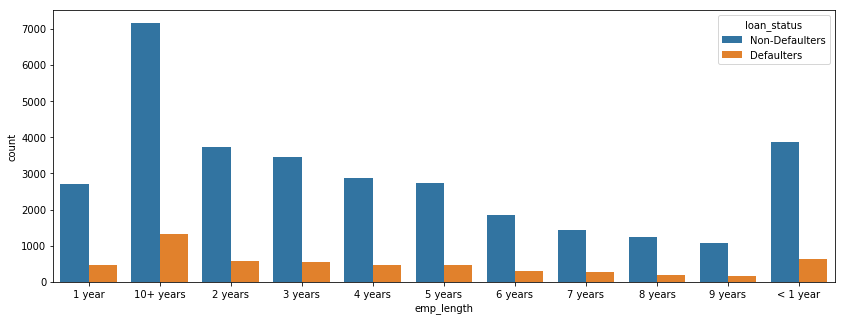

In [38]:
count_plot('emp_length')

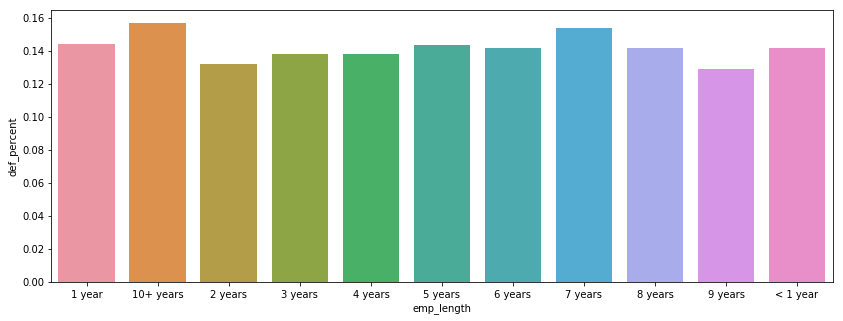

In [39]:
def_percentage_plot('emp_length')


Here it seems that employment length is not a contributing factor for the analysis of loan defaulters
as almost all groups of employment lengths are equally defaulting

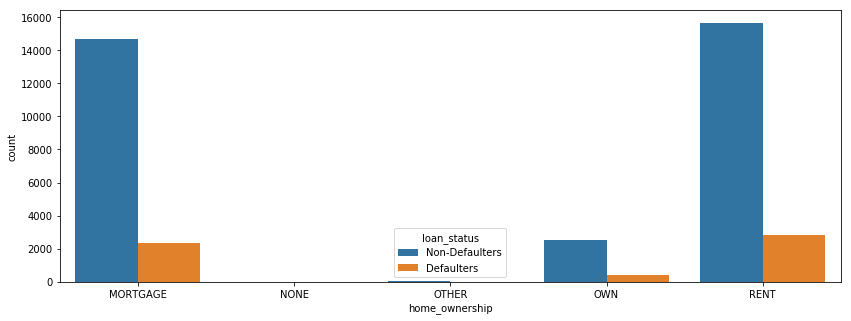

In [40]:
count_plot('home_ownership')

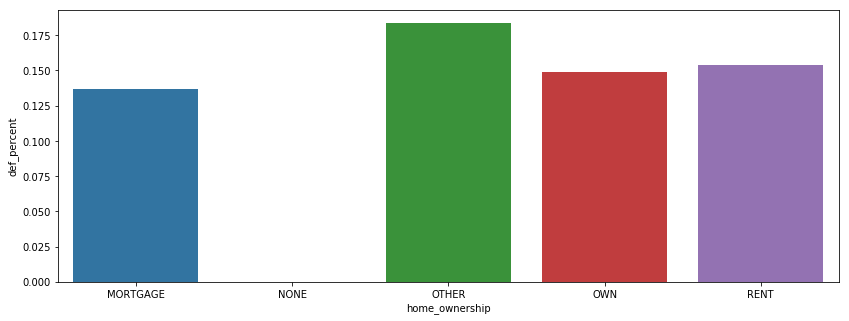

In [41]:
def_percentage_plot('home_ownership')

From the above plot it is again not evident that most of defaulters belong to which type of home_ownership.
Also,people with own homes are taking less number of loans compared to mortgage and rent.

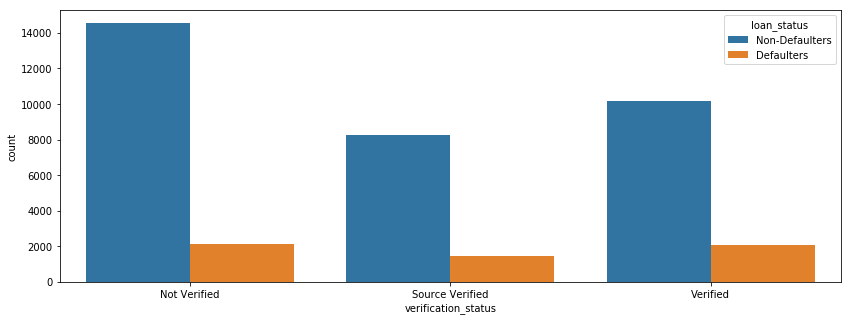

In [42]:
count_plot('verification_status')

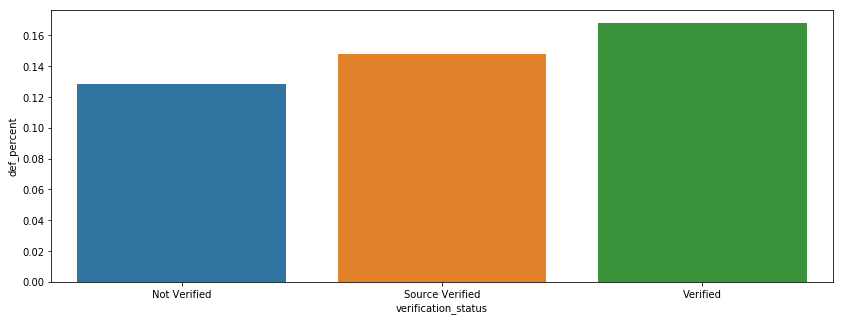

In [43]:
def_percentage_plot('verification_status')

### from the above plots it is evident that most of the loans are issued without proper verification. 
### and even in those issued loans the most of the defaulters are verified borrowers.
### So, I suggest to make modifications in how you verify their salary and occupational details.

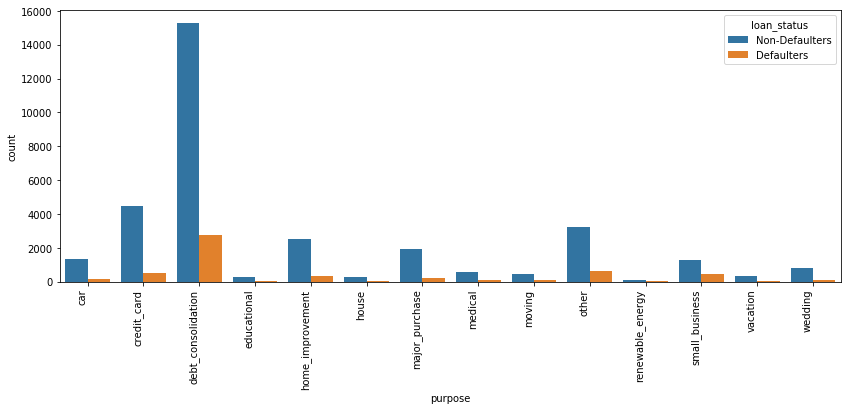

In [44]:
plt.figure(figsize=(14,5))
g = sns.countplot(loan['purpose'],hue = loan['loan_status'])
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.show()

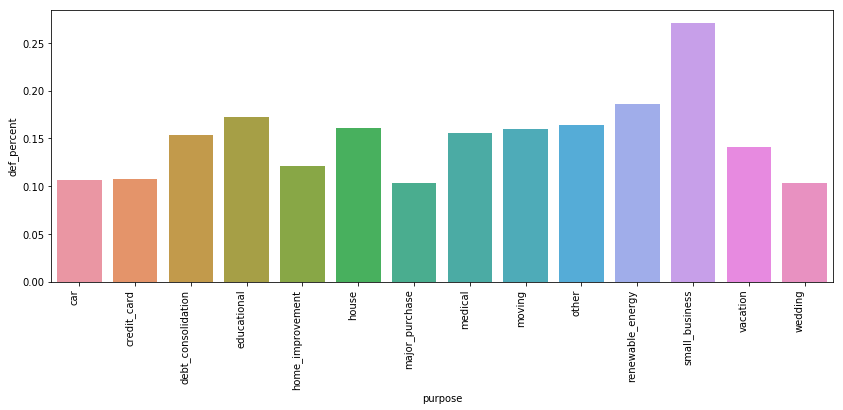

In [45]:
plt.figure(figsize=(14,5))
s = sns.barplot(x='purpose', y="def_percent", data=def_anal('purpose'))
s.set_xticklabels(s.get_xticklabels(), rotation=90, ha='right')
plt.show()

### most of the loans are issued towards debt_consolidation that means people are taking more loans to repay other loans....
### comparatively we can say that people who took loans for their small_businesses are defaulting the most.

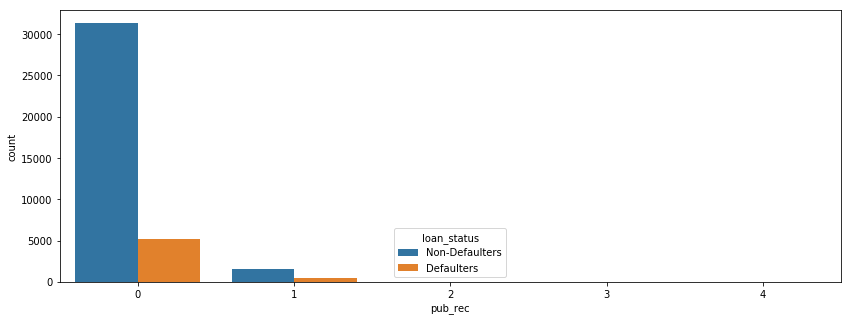

In [46]:
count_plot('pub_rec')

In [47]:
loan['pub_rec'].value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

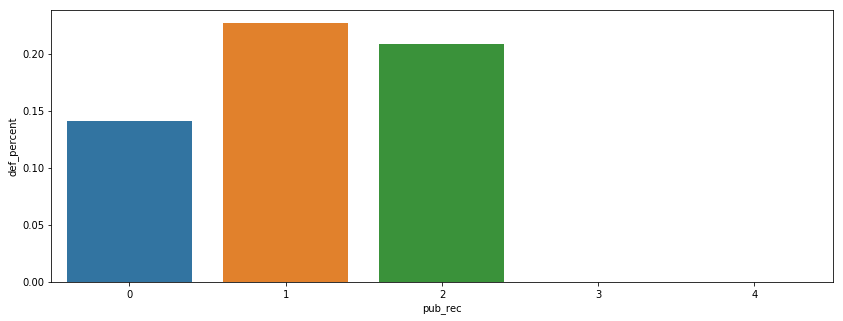

In [48]:
def_percentage_plot('pub_rec')

#### people with no derogatory public records are issued loans mostly and coming to who defaults it is not evident that people with more records are defaulting the most

In [51]:
loan.describe()

,id,member_id,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,issue_month,issue_year
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000
mean,6.763787e+05,8.422843e+05,11047.025430,11.932219,322.466318,6.877797e+04,13.272727,9.275423,7.114757,2010.309070
std,2.092639e+05,2.644519e+05,7348.441646,3.691327,208.639215,6.421868e+04,6.673044,4.401588,3.408523,0.882658
min,5.473400e+04,7.069900e+04,500.000000,5.420000,15.690000,4.000000e+03,0.000000,2.000000,1.000000,2007.000000
25%,5.120330e+05,6.611310e+05,5300.000000,8.940000,165.740000,4.000000e+04,8.130000,6.000000,4.000000,2010.000000
50%,6.564230e+05,8.392920e+05,9600.000000,11.710000,277.860000,5.886800e+04,13.370000,9.000000,7.000000,2011.000000
75%,8.291460e+05,1.037336e+06,15000.000000,14.380000,425.550000,8.200000e+04,18.560000,12.000000,10.000000,2011.000000
max,1.077501e+06,1.314167e+06,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,44.000000,12.000000,2011.000000


In [63]:
def distplot(col):
    plt.figure(figsize=(12,6))
    sns.distplot(loan[col])
    return plt.show()

C:\Users\SOLDIER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


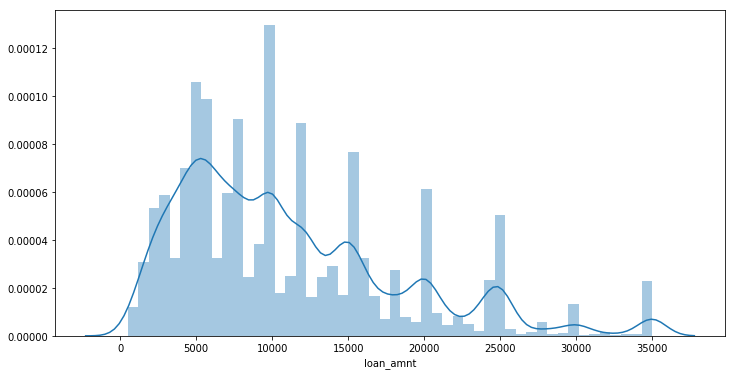

In [64]:
distplot('loan_amnt')

From the above plot it is evident of presence of outliers as the distribution is right skewed.hence further analysis is done by removing outliers.





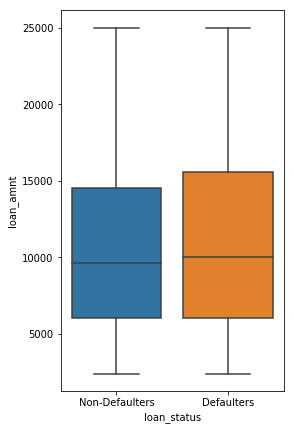

In [60]:
plt.figure(figsize=(4,7))
low,high = loan['loan_amnt'].quantile([0.05, 0.95])
sns.boxplot(x='loan_status',y = 'loan_amnt',data = loan[loan['loan_amnt'].between(low,high)])
plt.show()

From the above plot we can say that loans with higher amount are likely to get defaulted.

C:\Users\SOLDIER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


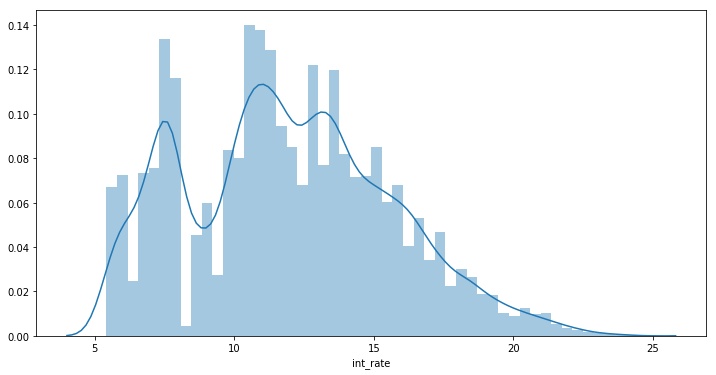

In [65]:
distplot('int_rate')

dividing bins depending upon the above plot
(0-7.5)
(7.5-9)
(9-12.5)
(12.5-15)
15+

most number of loans are issued with moderate interest rates

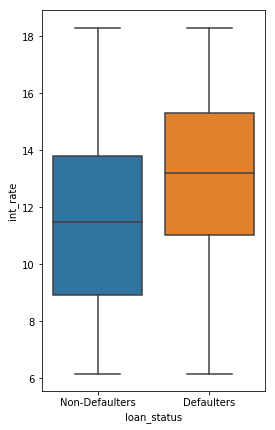

In [69]:
plt.figure(figsize=(4,7))
low,high = loan['int_rate'].quantile([0.05, 0.95])
sns.boxplot(x='loan_status',y = 'int_rate',data = loan[loan['int_rate'].between(low,high)])
plt.show()

### loans with higher interest rates are likely to get defaulted.

Hence needs further analysis by dividing them into bins.

In [82]:
bins = [0, 7.5, 9, 12.5, 15,20]
bin_labels = ['0-7.5','7.5-9', '9-12.5', '12.5-15','above_15']
loan['int_range'] = pd.cut(loan['int_rate'], bins, labels=bin_labels)
loan[['int_rate','int_range']].head(5)

,int_rate,int_range
0,10.65,9-12.5
1,15.27,above_15
2,15.96,above_15
3,13.49,12.5-15
4,7.90,7.5-9


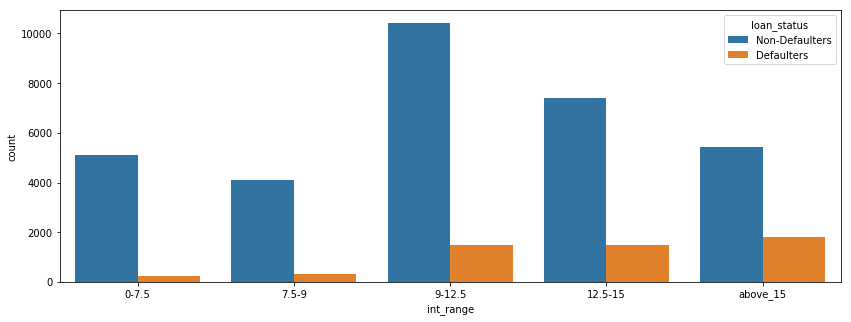

In [84]:
count_plot('int_range')

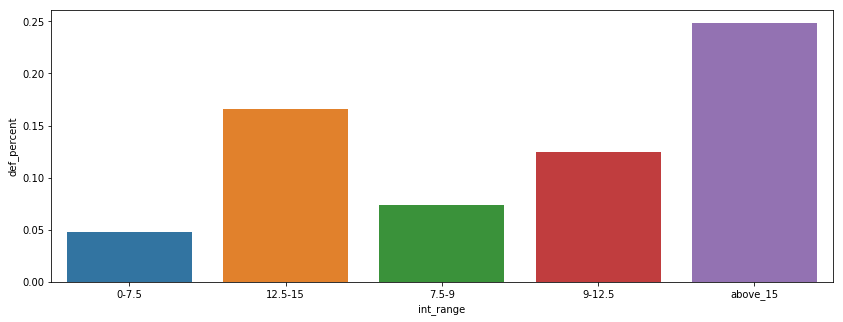

In [85]:
def_percentage_plot('int_range')

### most of the loans are with interest rates between 9-12.5

### loans with interest rates above 15 are getting defaulted the most.

C:\Users\SOLDIER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


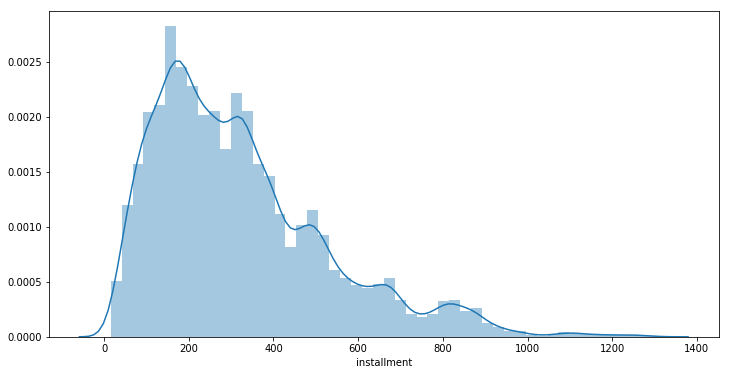

In [67]:
distplot('installment')

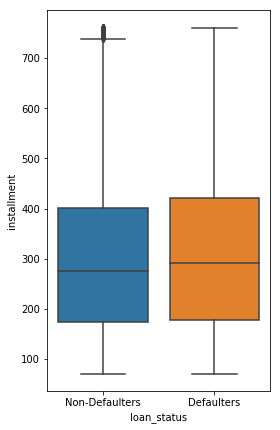

In [70]:
plt.figure(figsize=(4,7))
low,high = loan['installment'].quantile([0.05, 0.95])
sns.boxplot(x='loan_status',y = 'installment',data = loan[loan['installment'].between(low,high)])
plt.show()

loans with higher installments are slightly more likely to get defaulted comparatively.

C:\Users\SOLDIER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


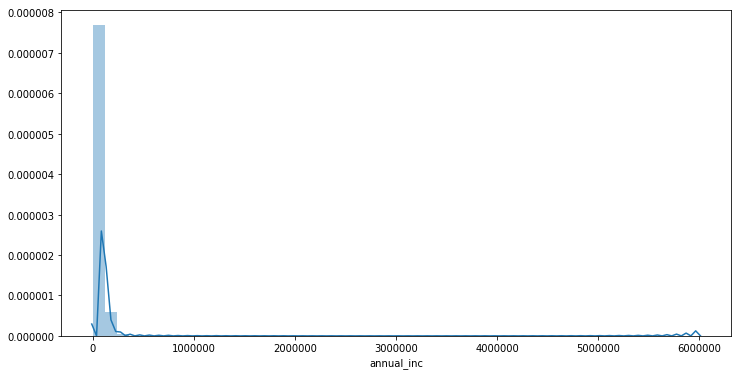

In [71]:
distplot('annual_inc')

removing top 0.5 percent of the annual incomes data

### it would be efficient if we analyse this feature by breaking down it into bins of particular interval

C:\Users\SOLDIER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


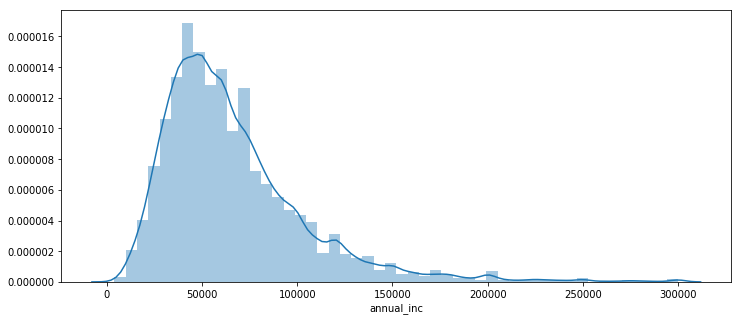

In [73]:
plt.figure(figsize=(12,5))
low,high = loan['annual_inc'].quantile([0.00, 0.995])
income = loan[loan['annual_inc'].between(low,high)]
sns.distplot(income['annual_inc'])
plt.show()

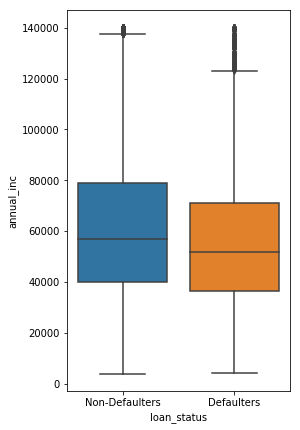

In [76]:
plt.figure(figsize=(4,7))
low,high = income['annual_inc'].quantile([0.00, 0.95])
sns.boxplot(x='loan_status',y = 'annual_inc',data = income[income['annual_inc'].between(low,high)])
plt.show()

In [87]:
bins = [0, 25000, 50000, 75000,100000,125000,400000]
bin_labels = ['0-25000', '25000-50000', '50000-75000','75000-100000','100000-125000','higher']
loan['inc_range'] = pd.cut(loan['annual_inc'], bins, labels=bin_labels)
loan[['annual_inc','inc_range']].head(5)

,annual_inc,inc_range
0,24000.0,0-25000
1,30000.0,25000-50000
2,12252.0,0-25000
3,49200.0,25000-50000
4,36000.0,25000-50000


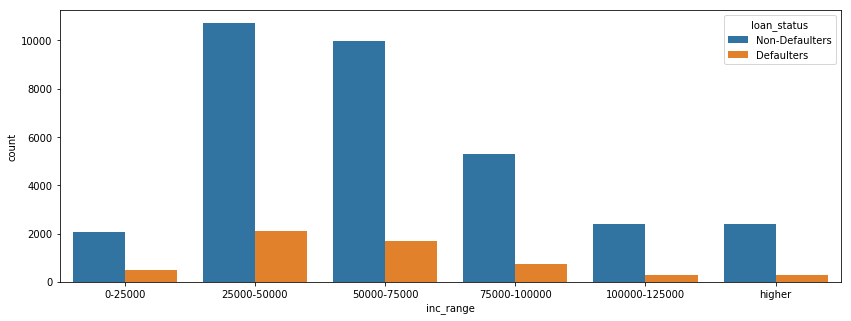

In [88]:
count_plot('inc_range')

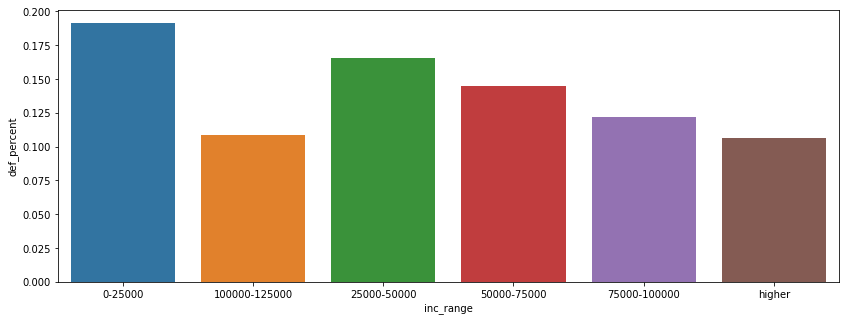

In [89]:
def_percentage_plot('inc_range')

### most of the loans are issued to those with 25K to 75K by considering the difference between their bins.

### it is clear that most of the defaulters are with income less than 25k.
#### also there is a trend like as income increases default percentage is decreasing..

### we can observe from the above plot that lower annual income tends to defaulting loans.

C:\Users\SOLDIER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


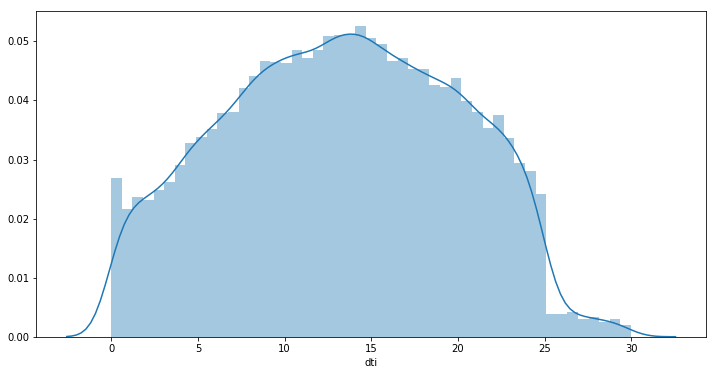

In [77]:
distplot('dti')

## dti:
    A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
    excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


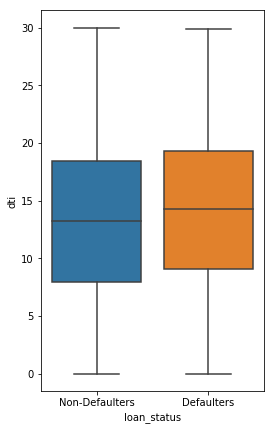

In [79]:
plt.figure(figsize=(4,7))
sns.boxplot(x='loan_status',y = 'dti',data = loan)
plt.show()

people with higher dti scores are likely to default loans

# OBSERVATIONS:

1. More than 75% of the loans issued are of 36 months tenure
2. loan has high chances of default if it's term is 60 months
3. large number of loans are issued at the end of the year
4. according to given data loans issued are increasing exponentially every year.
5. loans issued in 2007 are defaulted most but however lowest number of loans were issued in that year
6. grade feature tends to follow inverse relation in issuing and defaulting of loans, this doesn't throw much light on our      analysis
7. employment length seems to be an important factor to issue a loan but coming to defaulting of loans it doesn't matter much according to given data.
8. it seems that most of the people applying for loans stays in rented or mortgage homes and interestingly this doesn't effect defaulting loans.
9. now here comes the interesting observation , most of the loans are isssued without verifying the income source, and above that most of the loans that were defaulted were issued through verification. This proves that verification method has to be changed.
10. most of the loans were taken to consolidate previous debts, and default percentage is greater in case of small business loans comparatively
11. loans were rarely issued to people with public deregatory records.
12. most of the loans were issued to people with moderate annual income and most of the loan defaulters has low annual income
13. most of the loans were issued with interest rate between 9 - 12.5% and loans with higher interest rates tend to get defaulted.
14. defaulters of loans follow trend in case of annual income and interest rates i.e, there is a strong correlation.